In [2]:
from tensorflow.keras.utils import to_categorical, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [3]:
from google.colab import files
uploaded = files.upload()


Saving dataset.zip to dataset.zip


In [4]:
!unzip dataset.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/images/validation/fear/8797.jpg  
  inflating: /content/dataset/images/validation/fear/8818.jpg  
  inflating: /content/dataset/images/validation/fear/886.jpg  
  inflating: /content/dataset/images/validation/fear/9037.jpg  
  inflating: /content/dataset/images/validation/fear/9040.jpg  
  inflating: /content/dataset/images/validation/fear/9101.jpg  
  inflating: /content/dataset/images/validation/fear/911.jpg  
  inflating: /content/dataset/images/validation/fear/9179.jpg  
  inflating: /content/dataset/images/validation/fear/9205.jpg  
  inflating: /content/dataset/images/validation/fear/9232.jpg  
  inflating: /content/dataset/images/validation/fear/9251.jpg  
  inflating: /content/dataset/images/validation/fear/9261.jpg  
  inflating: /content/dataset/images/validation/fear/9281.jpg  
  inflating: /content/dataset/images/validation/fear/9302.jpg  
  inflating: /content/dataset/images/validation/fear/93

In [7]:
!ls /content/dataset

images


In [8]:
!ls /content/dataset/train

ls: cannot access '/content/dataset/train': No such file or directory


In [9]:
TRAIN_DIR = "/content/dataset/train"
TEST_DIR = "/content/dataset/test"

In [10]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        folder_path = os.path.join(dir, label)
        if os.path.isdir(folder_path):
            for imagename in os.listdir(folder_path):
                image_paths.append(os.path.join(folder_path, imagename))
                labels.append(label)
            print(label, "completed")
    return image_paths, labels

In [12]:
!ls /content

dataset  dataset.zip  sample_data


In [13]:
!unzip /content/dataset.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/images/validation/fear/8797.jpg  
  inflating: /content/dataset/images/validation/fear/8818.jpg  
  inflating: /content/dataset/images/validation/fear/886.jpg  
  inflating: /content/dataset/images/validation/fear/9037.jpg  
  inflating: /content/dataset/images/validation/fear/9040.jpg  
  inflating: /content/dataset/images/validation/fear/9101.jpg  
  inflating: /content/dataset/images/validation/fear/911.jpg  
  inflating: /content/dataset/images/validation/fear/9179.jpg  
  inflating: /content/dataset/images/validation/fear/9205.jpg  
  inflating: /content/dataset/images/validation/fear/9232.jpg  
  inflating: /content/dataset/images/validation/fear/9251.jpg  
  inflating: /content/dataset/images/validation/fear/9261.jpg  
  inflating: /content/dataset/images/validation/fear/9281.jpg  
  inflating: /content/dataset/images/validation/fear/9302.jpg  
  inflating: /content/dataset/images/validation/fear/93

In [14]:
!ls /content/dataset/images/images

train  validation


In [15]:
TRAIN_DIR = "/content/dataset/images/images/train"
TEST_DIR = "/content/dataset/images/images/validation"


In [16]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print("Training data sample:\n", train.head())


happy completed
neutral completed
sad completed
surprise completed
disgust completed
fear completed
angry completed
Training data sample:
                                                image  label
0  /content/dataset/images/images/train/happy/307...  happy
1  /content/dataset/images/images/train/happy/794...  happy
2  /content/dataset/images/images/train/happy/537...  happy
3  /content/dataset/images/images/train/happy/234...  happy
4  /content/dataset/images/images/train/happy/261...  happy


In [17]:
print(train)

                                                   image  label
0      /content/dataset/images/images/train/happy/307...  happy
1      /content/dataset/images/images/train/happy/794...  happy
2      /content/dataset/images/images/train/happy/537...  happy
3      /content/dataset/images/images/train/happy/234...  happy
4      /content/dataset/images/images/train/happy/261...  happy
...                                                  ...    ...
28816  /content/dataset/images/images/train/angry/152...  angry
28817  /content/dataset/images/images/train/angry/161...  angry
28818  /content/dataset/images/images/train/angry/293...  angry
28819  /content/dataset/images/images/train/angry/200...  angry
28820  /content/dataset/images/images/train/angry/275...  angry

[28821 rows x 2 columns]


In [18]:

test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print("Validation data sample:\n", test.head())


happy completed
neutral completed
sad completed
surprise completed
disgust completed
fear completed
angry completed
Validation data sample:
                                                image  label
0  /content/dataset/images/images/validation/happ...  happy
1  /content/dataset/images/images/validation/happ...  happy
2  /content/dataset/images/images/validation/happ...  happy
3  /content/dataset/images/images/validation/happ...  happy
4  /content/dataset/images/images/validation/happ...  happy


In [19]:
print(test)
print(test['image'])

                                                  image  label
0     /content/dataset/images/images/validation/happ...  happy
1     /content/dataset/images/images/validation/happ...  happy
2     /content/dataset/images/images/validation/happ...  happy
3     /content/dataset/images/images/validation/happ...  happy
4     /content/dataset/images/images/validation/happ...  happy
...                                                 ...    ...
7061  /content/dataset/images/images/validation/angr...  angry
7062  /content/dataset/images/images/validation/angr...  angry
7063  /content/dataset/images/images/validation/angr...  angry
7064  /content/dataset/images/images/validation/angr...  angry
7065  /content/dataset/images/images/validation/angr...  angry

[7066 rows x 2 columns]
0       /content/dataset/images/images/validation/happ...
1       /content/dataset/images/images/validation/happ...
2       /content/dataset/images/images/validation/happ...
3       /content/dataset/images/images/valida

In [20]:
from tqdm.notebook import tqdm

In [21]:

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)  # converts to NumPy array with shape (48, 48, 1)
        img = img / 255.0  # normalize pixel values
        features.append(img)
    return np.array(features)

In [22]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [23]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [24]:
x_train = train_features/255.0
x_test = test_features/255.0

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [27]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [28]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [29]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='checkpoint_epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_best_only=False,
    verbose=1
)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,            # normalize pixel values
    rotation_range=10,         # random rotation
    width_shift_range=0.1,     # horizontal shift
    height_shift_range=0.1,    # vertical shift
    zoom_range=0.1,            # zoom
    horizontal_flip=True        # flip images
)

# Only rescaling for validation/test
val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from folders
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,255 (1.85 MB)

 Trainable params: 485,255 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[checkpoint, early_stop]
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 35s 62ms/step - accuracy: 0.2385 - loss: 1.8292 - val_accuracy: 0.3388 - val_loss: 1.6797
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.2954 - loss: 1.7305 - val_accuracy: 0.3909 - val_loss: 1.5474
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.3568 - loss: 1.6269 - val_accuracy: 0.4628 - val_loss: 1.4143
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.4072 - loss: 1.5303 - val_accuracy: 0.4929 - val_loss: 1.3337
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.4312 - loss: 1.4726 - val_accuracy: 0.5096 - val_loss: 1.2969
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4579 - loss: 1.4191 - val_accuracy: 0.5157 - val_loss: 1.2627
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4649 - loss: 1.3906 - val_accuracy: 0.5306 - val_loss: 1.2306
Epoch 8/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4773 - loss: 1.3604 - val_accurac

In [33]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test), callbacks=[checkpoint])

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2386 - loss: 1.8373
Epoch 1: saving model to checkpoint_epoch_01.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.2387 - loss: 1.8372 - val_accuracy: 0.2583 - val_loss: 1.8142
Epoch 2/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2424 - loss: 1.8214
Epoch 2: saving model to checkpoint_epoch_02.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.2424 - loss: 1.8214 - val_accuracy: 0.2583 - val_loss: 1.8086
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2453 - loss: 1.8141
Epoch 3: saving model to checkpoint_epoch_03.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2453 - loss: 1.8141 - val_accuracy: 0.2583 - val_loss: 1.8090
Epoch 4/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2469 - loss: 1.8130
Epoch 4: saving model to checkpoint_epoch_04.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.2469 - loss: 1.8130 - val_accuracy: 0.2583 - val_loss: 1.8104
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2473 - loss: 1.8141
Epoch 5: saving model to checkpoint_epoch_05.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.2473 - loss: 1.8141 - val_accuracy: 0.2583 - val_loss: 1.8095
Epoch 6/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2493 - loss: 1.8104
Epoch 6: saving model to checkpoint_epoch_06.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2493 - loss: 1.8105 - val_accuracy: 0.2583 - val_loss: 1.8089
Epoch 7/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2488 - loss: 1.8157
Epoch 7: saving model to checkpoint_epoch_07.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2488 - loss: 1.8157 - val_accuracy: 0.2583 - val_loss: 1.8096
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2520 - loss: 1.8117
Epoch 8: saving model to checkpoint_epoch_08.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2520 - loss: 1.8117 - val_accuracy: 0.2583 - val_loss: 1.8098
Epoch 9/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2474 - loss: 1.8096
Epoch 9: saving model to checkpoint_epoch_09.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.2474 - loss: 1.8096 - val_accuracy: 0.2583 - val_loss: 1.8089
Epoch 10/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2502 - loss: 1.8136
Epoch 10: saving model to checkpoint_epoch_10.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.2502 - loss: 1.8136 - val_accuracy: 0.2583 - val_loss: 1.8094
Epoch 11/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2507 - loss: 1.8105
Epoch 11: saving model to checkpoint_epoch_11.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2507 - loss: 1.8105 - val_accuracy: 0.2583 - val_loss: 1.8098
Epoch 12/100
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2501 - loss: 1.8110
Epoch 12: saving model to checkpoint_epoch_12.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2501 - loss: 1.8110 - val_accuracy: 0.2583 - val_loss: 1.8095
Epoch 13/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2481 - loss: 1.8122
Epoch 13: saving model to checkpoint_epoch_13.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.2481 - loss: 1.8122 - val_accuracy: 0.2583 - val_loss: 1.8103
Epoch 14/100
156/226 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.2526 - loss: 1.8112

KeyboardInterrupt: 

In [38]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [39]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [42]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

def ef(image):
    # Load the image in grayscale and resize to 48x48
    img = load_img(image, color_mode='grayscale', target_size=(48,48))

    # Convert to array
    feature = img_to_array(img)

    # Reshape to match model input (1,48,48,1)
    feature = feature.reshape(1,48,48,1)

    # Normalize pixel values
    return feature / 255.0

In [44]:
image = '/content/dataset/images/images/train/sad/42.jpg'
print("original image is sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)


original image is sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
model prediction is sad


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
model prediction is sad


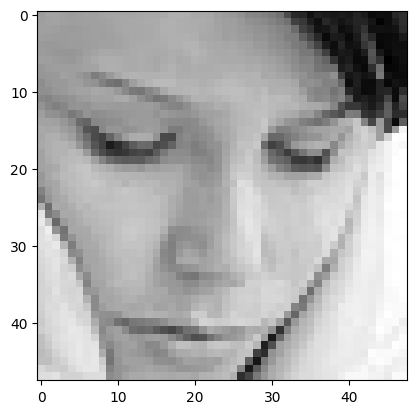

In [47]:
image = '/content/dataset/images/images/train/sad/42.jpg'
print("original image is sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

plt.imshow(img.reshape(48,48),cmap='gray')


original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  neutral


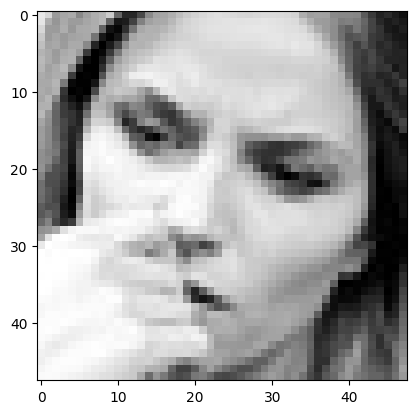

In [48]:
image = '/content/dataset/images/images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is  angry


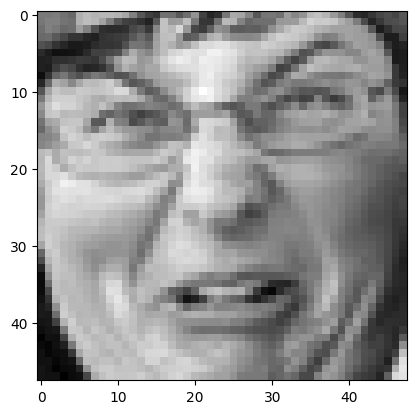

In [49]:

image = '/content/dataset/images/images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  happy


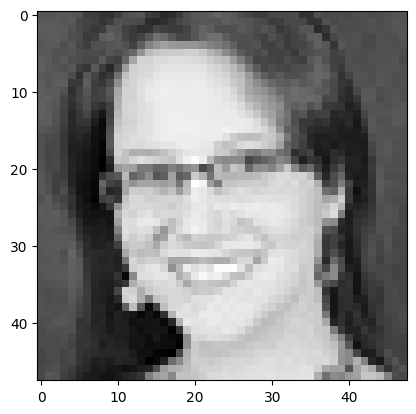

In [50]:

image = '/content/dataset/images/images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  surprise


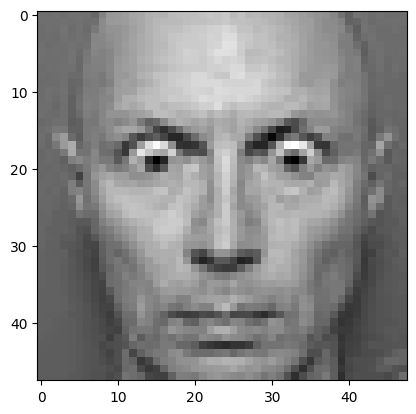

In [51]:

image = '/content/dataset/images/images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')